In [29]:
from sympy import symbols, Function, latex
from IPython.display import display, Math
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import sympy as sp

## Cálculo da Função de Transferência de 2º Grau

In [30]:
s, omega_c = symbols('s omega_c')


G = omega_c**2 / (s**2 + 2*omega_c*s + omega_c**2)


display(Math(latex(G)))

<IPython.core.display.Math object>

In [31]:
zeta = symbols('zeta')
G = omega_c**2 / (s**2 + 2*zeta*omega_c*s + omega_c**2)

display(Math(latex(G)))

<IPython.core.display.Math object>

### Parâmetros do Filtro

In [32]:
fc = 2500  # Frequência de corte em Hz
fs = 44100  # Taxa de amostragem em Hz
w_c = 2 * np.pi * fc  # Conversão da frequência de corte para radianos por segundo

In [33]:
# Fator de amortecimento (zeta)
zeta = 0.707

In [34]:
# Função de transferência G(s) no domínio contínuo
# Numerador e denominador para a função de transferência G(s) de segunda ordem
num = [w_c**2]  # Numerador: ω_c²
den = [1, 2 * zeta * w_c, w_c**2]  # Denominador: s² + 2ζω_c s + ω_c²
system_s = signal.TransferFunction(num, den)  # Criação do sistema contínuo

display(Math(latex(system_s)))

<IPython.core.display.Math object>

Coeficientes do Numerador (b): [0.02471109 0.04942218 0.02471109]
Coeficientes do Denominador (a): [ 1.         -1.50876379  0.60760814]


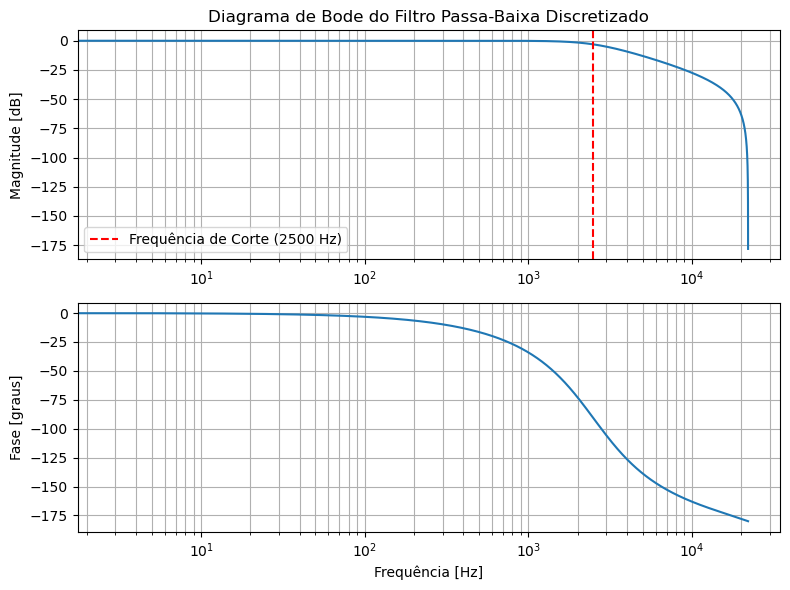

In [35]:
system_z = system_s.to_discrete(1 / fs, method='bilinear')
b, a = system_z.num, system_z.den

w, h = signal.freqz(b, a, worN=8000, fs=fs)

# Plotando o Diagrama de Bode com magnitude e fase
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

print("Coeficientes do Numerador (b):", b)
print("Coeficientes do Denominador (a):", a)
# Gráfico da Magnitude
ax1.semilogx(w, 20 * np.log10(abs(h)))  # Magnitude em dB
ax1.set_title('Diagrama de Bode do Filtro Passa-Baixa Discretizado')
ax1.set_ylabel('Magnitude [dB]')
ax1.grid(which='both', axis='both')
ax1.axvline(fc, color='red', linestyle='--', label=f'Frequência de Corte ({fc} Hz)')
ax1.legend()

# Gráfico da Fase
ax2.semilogx(w, np.angle(h, deg=True))  # Fase em graus
ax2.set_xlabel('Frequência [Hz]')
ax2.set_ylabel('Fase [graus]')
ax2.grid(which='both', axis='both')

plt.tight_layout()
plt.show()

In [36]:
b = [0.0247, 0.0494, 0.0247]
a = [1, -1.5088, 0.6076] 

def equacao_diferencas(b, a):
    Y = sp.symbols('Y')
    U = sp.symbols('U')
    k = sp.symbols('k')

    lhs = Y
    for i in range(1, len(a)):
        lhs -= a[i] * sp.Symbol(f'Y(k-{i})')

    rhs = sum(b[j] * sp.Symbol(f'U(k-{j})') for j in range(len(b)))

    display_expr = sp.Eq(sp.Symbol('Y(k)'), lhs + rhs)
    display(Math(sp.latex(display_expr)))

equacao_diferencas(b, a)

<IPython.core.display.Math object>